<a href="https://colab.research.google.com/github/Gwontips/Data-Analysis-and-Visualization/blob/main/EDA_Titanic_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
# Simple Exploratory Data Analaysis of Titanic_Train. 
# The datasets relates to the collapse of Titanic Ship which better be recalled with the Hollywood Movie 'Titanic'.  

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
titanic_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')

In [136]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [137]:
titanic_df.shape  # 891 rows and 12 columns.

(891, 12)

In [138]:
titanic_df.columns  # Column names.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [139]:
# titanic_df.info() OR
titanic_df.dtypes   # Datatypes of each features.

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [140]:
titanic_df.isnull().sum()  # Checking any missing values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
len(titanic_df) # 891 Passengers were in the Titanic

891

In [142]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [143]:
titanic_df['Sex'].value_counts()/len(titanic_df)*100   # Percentage of Male and Female

male      64.758698
female    35.241302
Name: Sex, dtype: float64

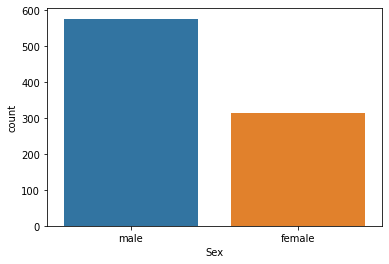

In [144]:
ax=sns.countplot(x='Sex',data=titanic_df)

In [145]:
titanic_df['Survived'].value_counts()  # Only 342 Passengers Survived and 549 Passengers Died.

0    549
1    342
Name: Survived, dtype: int64

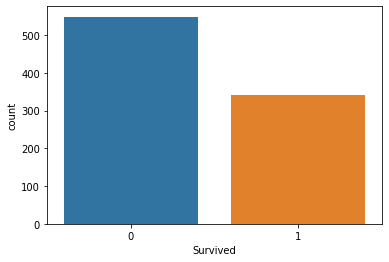

In [146]:
ax=sns.countplot(x='Survived',data=titanic_df)

In [147]:
titanic_df.groupby('Survived')['Sex'].value_counts()  # Number of Male and Female who died (0) and who survived (1) in the Titanic fall.

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

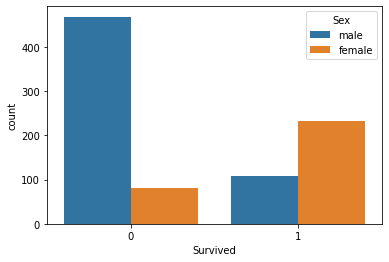

In [148]:
ax=sns.countplot(x='Survived', data=titanic_df, hue='Sex')

In [149]:
titanic_df['Pclass'].unique()  # Passenger Class are 1, 2, and 3 only.

array([3, 1, 2])

In [150]:
titanic_df['Pclass'].value_counts()  # Number of Passengers in each Class type.

3    491
1    216
2    184
Name: Pclass, dtype: int64

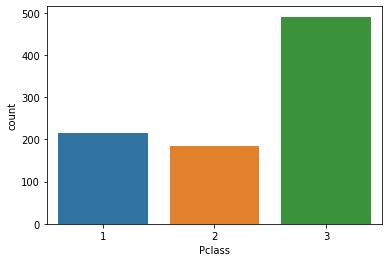

In [151]:
ax=sns.countplot(x='Pclass',data=titanic_df)

In [152]:
titanic_df.groupby('Survived')['Pclass'].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

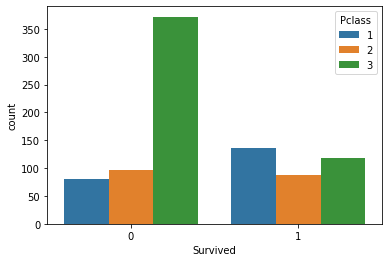

In [153]:
ax=sns.countplot(x='Survived',data=titanic_df,hue='Pclass')

In [154]:
titanic_df.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

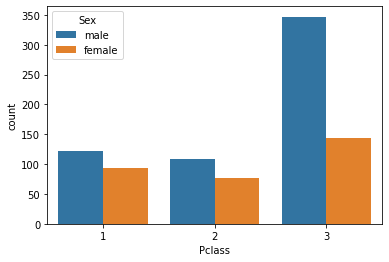

In [155]:
ax=sns.countplot(x='Pclass',hue='Sex',data=titanic_df)

In [156]:
titanic_df['Age'].isna().sum()  # 177 values are missing under Age features.

177

In [157]:
np.mean(titanic_df['Age'])   # Average Age of the Passengers is 30 years.

29.69911764705882

In [158]:
titanic_df['Age'].max()

80.0

In [159]:
titanic_df['Age'].min()

0.42

In [160]:
titanic_df['Age'].fillna(value=np.mean(titanic_df['Age']),inplace=True)  # The missing values of Age is filled with the average age of the Passengers which is 29.699.

In [161]:
titanic_df['Age'].isna().sum()

0

In [162]:
Q1,Q2,Q3=np.percentile(titanic_df['Age'].values,[25,50,75])   # Quartiles of the age are respectively given.

In [163]:
Q1,Q2,Q3

(22.0, 29.69911764705882, 35.0)

In [164]:
IQR=Q3-Q1
IQR # Inter-quartile range

13.0

In [165]:
lower_outlier= Q1 - (1.5*IQR)
lower_outlier

2.5

In [166]:
upper_outlier= Q3 + (1.5*IQR)
upper_outlier

54.5

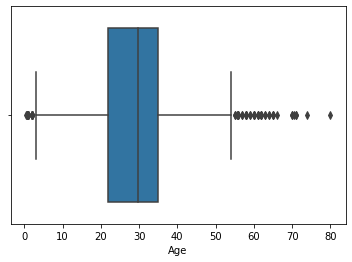

In [167]:
ax=sns.boxplot(x='Age',data=titanic_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


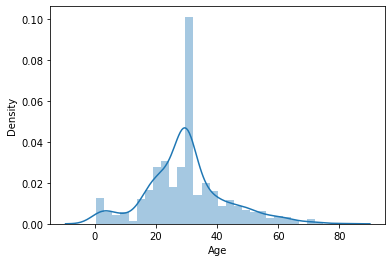

In [168]:
ax=sns.distplot(titanic_df['Age'])

In [169]:
titanic_df.groupby(['Sex'])['Age'].mean() # Average age of Male and Female Passengers

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [170]:
titanic_df['Fare'].isna().sum()

0

In [171]:
np.mean(titanic_df['Fare'])

32.204207968574636

In [172]:
np.median(titanic_df['Fare'])

14.4542

In [173]:
np.percentile(titanic_df['Fare'],[25,50,75])

array([ 7.9104, 14.4542, 31.    ])

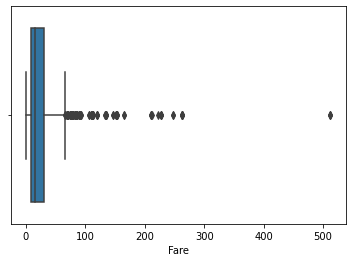

In [174]:
ax=sns.boxplot(x='Fare',data=titanic_df)

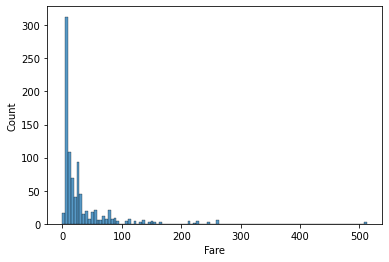

In [175]:
ax=sns.histplot(x='Fare',data=titanic_df)

In [176]:
new_df=titanic_df.groupby('Survived').mean()

In [177]:
new_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.415100,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.549778,0.473684,0.464912,48.395408


In [178]:
titanic_df.drop(columns=['Survived','Pclass','SibSp','Parch'],inplace=True)
titanic_df.describe()   # Summary Statistical Values

,PassengerId,Age,Fare
count,891.000000,891.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,13.002015,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,22.000000,7.910400
50%,446.000000,29.699118,14.454200
75%,668.500000,35.000000,31.000000
max,891.000000,80.000000,512.329200


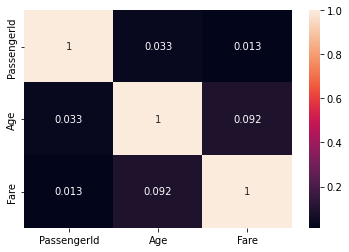

In [179]:
ax=sns.heatmap(titanic_df.corr(),annot=True)